In [1]:
'''
%load_ext pycodestyle_magic
%pycodestyle_on
'''

In [3]:
%pylab inline

import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
import plotly.express as px
import plotly.graph_objects as go

import gpelletier.custom.projet4.functions as gp4f

Populating the interactive namespace from numpy and matplotlib


In [ ]:
'''
In the previous file, we used a RFM segmentation.

The conclusion was:

The RFM segmentation has two big defaults:
- the segmentation can only represent customers thanks to limited features.
If we want to add more criteria, it will be impossible.
- the scores and, in fine, the segmentation of the customers
depend on arbitrary decision (e.g. what is a good or bad recency).

In order to improve the segmentation, and to avoid arbitrary decision,
we will use an unsupervised algorithm : a K-Means clustering.
'''

In [ ]:
#-------------------#
#-------------------#

In [2]:
# Define the data for the analysis

data = gp4f.data_no_quali_features('customer_unique_id')

data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', '2017-01-01', 3
    )

x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

In [4]:
x_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Monetary_Value  4788 non-null   float64
 1   Frequency       4788 non-null   float64
 2   Recency         4788 non-null   float64
 3   Delivery        4788 non-null   float64
 4   Review          4788 non-null   float64
dtypes: float64(5)
memory usage: 187.2 KB


In [ ]:
#-------------------#
#-------------------#

In [ ]:
# Analysis of the clusters
# Goal : find the best number of clusters

Text(0, 0.5, 'silhouette_score')

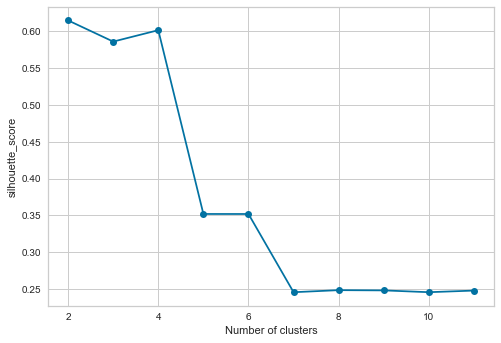

In [5]:
# Show the silhouette_score for different 'n_clusters' values
silhouettes = []

for nbr_clusters in range(2, 12):
    cls_kmeans = KMeans(n_clusters=nbr_clusters, random_state=0)
    cls_kmeans.fit(x_scaled)

    silh = silhouette_score(x_scaled, cls_kmeans.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 12), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

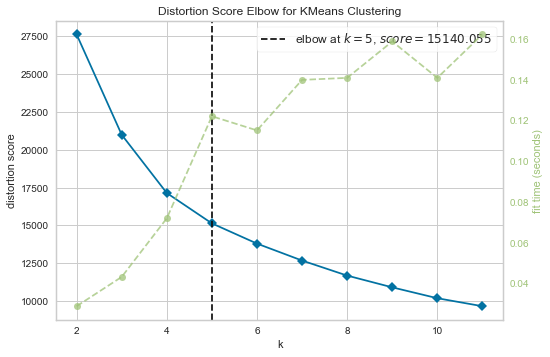

In [3]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 12))

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

In [ ]:
'''
The clustering model will use 5 clusters
'''

In [ ]:
#-------------------#
#-------------------#

In [4]:
clustering_model = KMeans(n_clusters=5, random_state=0)
clustering_model.fit(x_scaled)

KMeans(n_clusters=5, random_state=0)

In [ ]:
#-------------------#
#-------------------#

In [ ]:
# Analyse of the cluster methods
# Goal : find the label names

In [12]:
df_tmp = data_subset_RFM.copy()
df_tmp.insert(loc=0, column='group', value=clustering_model.labels_)

In [14]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 0]['payment_value']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 1]['payment_value']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 2]['payment_value']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 3]['payment_value']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 4]['payment_value']))
fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 0]['frequency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 1]['frequency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 2]['frequency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 3]['frequency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 4]['frequency']))
fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 0]['recency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 1]['recency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 2]['recency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 3]['recency']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 4]['recency']))
fig.show()

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 0]['delivery_time']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 1]['delivery_time']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 2]['delivery_time']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 3]['delivery_time']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 4]['delivery_time']))
fig.show()

In [18]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 0]['review_score']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 1]['review_score']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 2]['review_score']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 3]['review_score']))
fig.add_trace(go.Box(y=df_tmp[df_tmp['group'] == 4]['review_score']))
fig.show()

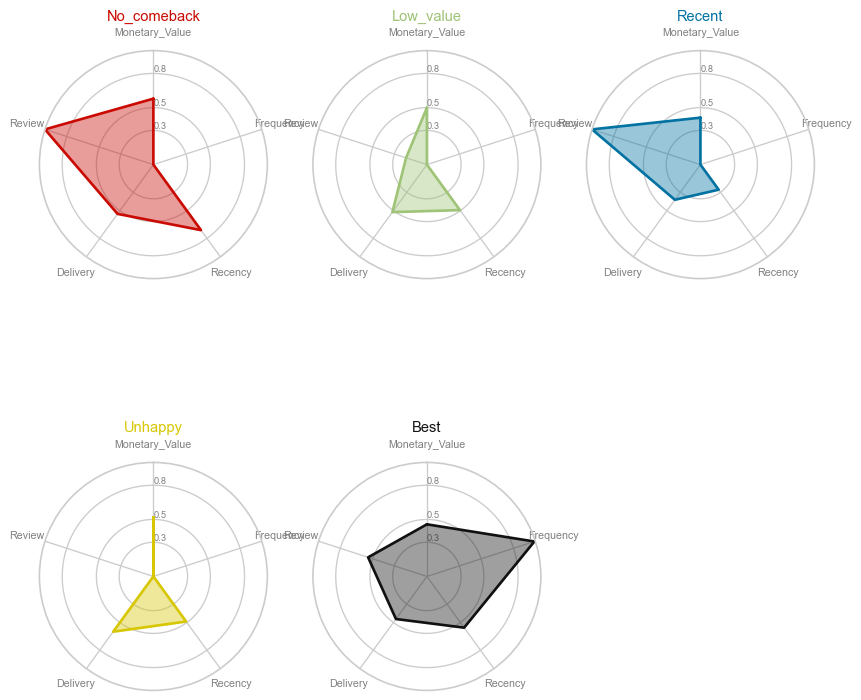

In [21]:
scaler = QuantileTransformer(random_state=0)
x_tranform_bis = scaler.fit_transform(x_scaled)

result = pd.DataFrame(x_tranform_bis)
result.columns = [
    'Monetary_Value', 'Frequency', 'Recency', 'Delivery', 'Review'
    ]
result.insert(loc=0, column='group', value=clustering_model.labels_)

df_show_clusters = result.copy()
df_show_clusters = df_show_clusters.groupby(
    by='group', as_index=False
    ).agg('mean')
labels = gp4f.labels_client(
    x_scaled, clustering_model,
    5
    ).sort_values(by='group')

LABEL_COLOR_MAP = {0 : 'r', 1 : 'g',
                   2 : 'b', 3 : 'y',
                   4 : 'k', 5 : 'c'
                   }

# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_show_clusters.index))
    
# Loop to plot
for row in range(0, len(df_show_clusters)):
    gp4f.make_spider(
        df_show_clusters,
        row=row,
        title=labels.iloc[row, -1],
        color=LABEL_COLOR_MAP[row]
        )

In [ ]:
'''
The transformations used on the data
(e.g. groupby by cluster and mean of each feature)
impact the range of the features.

But, the goal here is to visualize trends:
- the no_comeback customers have the biggest recency,
- the low_value customers didn't perform in a good way in any category,
- the recent customers have the lowest recency
(they come on the website few days ago, in compare to the other customers),
- the unhappy customers have the lowest review and the biggest delivery,
- the best customers are those who come frequently.
'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
# Visualization of the clusters, thanks to a t-sne:

In [15]:
tfs_embedded = TSNE(
    n_components=2, perplexity=40, verbose=2
    ).fit_transform(x_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4788 samples in 0.010s...
[t-SNE] Computed neighbors for 4788 samples in 0.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4788
[t-SNE] Computed conditional probabilities for sample 2000 / 4788
[t-SNE] Computed conditional probabilities for sample 3000 / 4788
[t-SNE] Computed conditional probabilities for sample 4000 / 4788
[t-SNE] Computed conditional probabilities for sample 4788 / 4788
[t-SNE] Mean sigma: 0.342075
[t-SNE] Computed conditional probabilities in 0.203s
[t-SNE] Iteration 50: error = 80.3640823, gradient norm = 0.0246033 (50 iterations in 1.186s)
[t-SNE] Iteration 100: error = 72.5545197, gradient norm = 0.0073432 (50 iterations in 0.929s)
[t-SNE] Iteration 150: error = 71.4146957, gradient norm = 0.0041365 (50 iterations in 0.877s)
[t-SNE] Iteration 200: error = 71.0016708, gradient norm = 0.0027092 (50 iterations in 0.829s)
[t-SNE] Iteration 250: error = 70.7693176, gradient norm = 0.002076

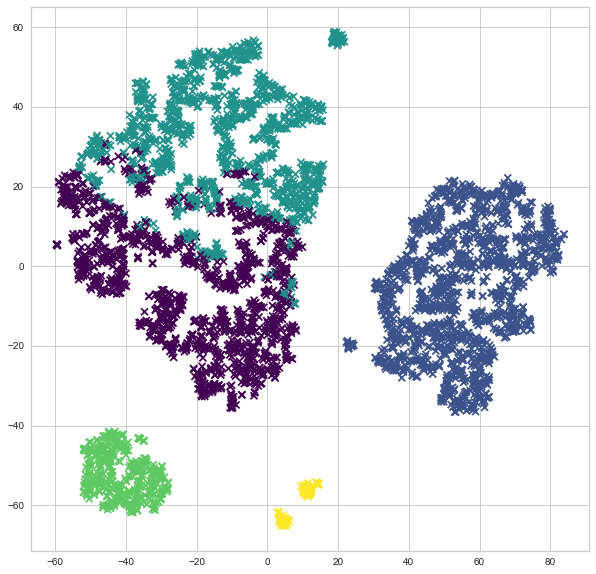

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(
    tfs_embedded[:, 0],
    tfs_embedded[:, 1],
    marker='x',
    c=clustering_model.labels_,
    cmap='viridis'
    )
plt.show()

In [ ]:
'''
The green, yellow and deep blue clusters are interesting
(far away from each other).
But, the cyan and purple clusters are to close.
The dataset is not so good, and the similiraty of
the different customer behaviors impact the quality of the clusters.
'''

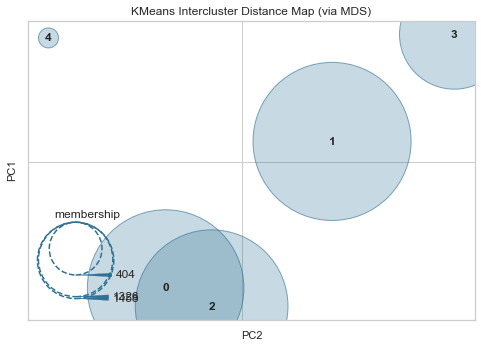

In [18]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(clustering_model)

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

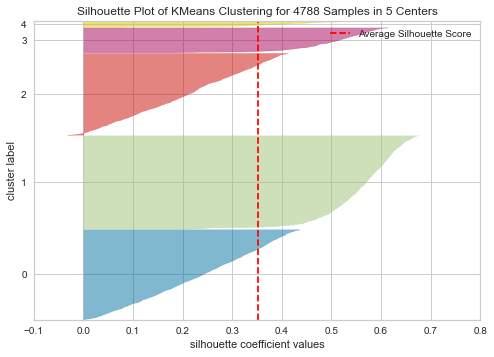

In [6]:
# Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(clustering_model, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(x_scaled)
# Finalize and render the figure
visualizer.show()

In [ ]:
'''
As expected, because of the dataset,
the quality of the clusters is not very good.

We can see 3 clusters distant from each other.
But 2 clusters overlap.
'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
# Stability of the model:

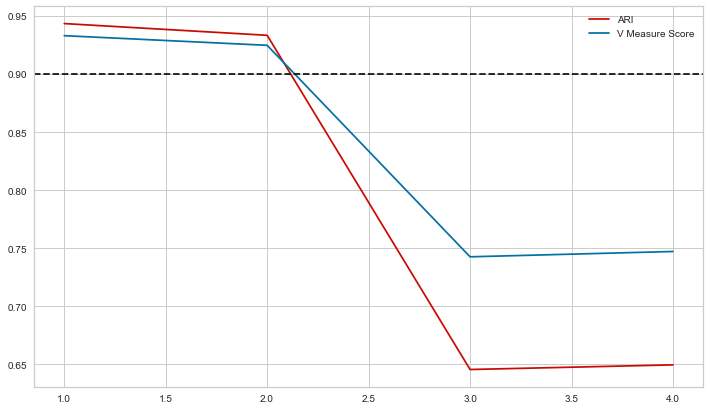

In [2]:
gp4f.clustering_models_score(
    'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', date='2017-01-01',
    delta_month=3, number_of_months=3, nbr_cycles=4,
    nbr_clusters=5, random_state_number=0, threshold=0.90
    )

In [ ]:
'''
The x axis represent the number of trimesters we add
to the dataset.
After 2 additions (9 months in total), the randscore is still above 0.90.
After 3 additions (12 months in total), the randscore is under 0.90.
We will have to fit the model once again after 9 months.
'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
# Analysis of the olist customers

In [5]:
gp4f.sankey_do_all(
    'customer_unique_id', 'customer_id', 'order_id',
    'product_id', 'payment_value', 'review_score',
    'order_purchase_timestamp', date='2017-01-01',
    delta_month=3, nbr_cycles=2,
    nbr_clusters=5, random_state_number=0
    )

In [ ]:
'''
Non exhausitive notes:

There is few 'best' customers.
There is a lot of customers, who didn't come back after their first order.
There is an interesting amount of new customers.
There is a lot of uninteresting customers
(low value, i.e. they spend not much money,
and don't come many times on the website).

About the recency:
Few recent customers will move to the category 'best' customers.
The majority  of the customers belongs to the 'no comeback'
(didn't comeback after their first order) and the 'low value' categories.
Observation:
The company didn't success to retain its customers.

About the 'unhappy' customers:
Few 'best' customers moved to the 'unhappy' category.
The majority of this kind of customers didn't come back
('no comeback' or 'low value').

Example of possible improvements:
- To retain the customers
    -> prizes reduction focused on the frequency of the customers,
- to avoid recent customers moving to the unhappy category
    -> to study the delivery time with the carrier company
    -> to study the quality of the products available on the website.
- promotion on targeted products (thanks to the customer purchase)
in order to bring back 'no comeback' customers.
'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
'''
Thanks to the K-Means algorithm, we can now create a segmentation
with 2 important improvements (comparaing to the RFM segmentation).

In one hand :
we can use more than 3 features.
We will be able to add the features we need to try
to better understand the customers behaviors.

In the other hand :
We don't need to give scores for each customers.
We will gain time : we don't need to spend time on choosing
what is a good or bad score.
So, the chance to introduce a bias is reduced.

Besides, our K-Means algorithm can predict the behaviors of the customers.
It will need to be regulary fit again,
but the predictions can help to anticipate some behaviors.
'''